# **Pymaceuticals Inc.**
---
## Module 5- Matplotlib Challenge
### By: Zack Crowley
- Started Sun 10/23/22

### **Analysis**
- Add your analysis here!!!

Submission <br> 

    Review all the figures and tables that you generated in this assignment. Write at least three observations or inferences that can be made from the data. Include these observations at the top of your notebook.

- Update readme before turning in!!!
 
 ---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice:
uni_mice_id = len(mouse_df["Mouse ID"].unique())
print(f'The number of unique mice ID is: {uni_mice_id}')


The number of unique mice ID is: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_ID_time = mouse_df.loc[mouse_df.duplicated(), :] 
mouse_ID_time["Mouse ID"]


137    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_ID = mouse_df[mouse_df["Mouse ID"] == "g989"]   
dup_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID:
mouse_clean_df = mouse_df.drop(mouse_df[(mouse_df["Mouse ID"] == "g989")].index,axis=0)     
# Mouse ID g989 no longer in the new df:
mouse_clean_df[mouse_df["Mouse ID"] == "g989"]   

/Users/zackcrowley/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [6]:
# Checking the number of mice in the clean DataFrame.
uni_Clean_mice_id = len(mouse_clean_df["Mouse ID"].unique())
print(f'Now, the number of unique mice ID in the clean df is: {uni_Clean_mice_id}')


Now, the number of unique mice ID in the clean df is: 248


## **Summary Statistics**

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# First, create a groupby object of "Drug Regimen", for only the col = "Tumor Volume (mm3)":
group_drug_tumor = mouse_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# Then, generate the summary statists:
drug_tumor_mean = group_drug_tumor.mean()
drug_tumor_median = group_drug_tumor.median()
drug_tumor_var = group_drug_tumor.var()
drug_tumor_std = group_drug_tumor.std()
drug_tumor_sem = group_drug_tumor.sem()

# Next, assemble the resulting series into a single summary DataFrame called "drug_tumor_summ_df":
# drug_tumor_summ_df = pd.DataFrame()
# drug_tumor_summ_df["Mean"] = drug_tumor_mean
drug_tumor_summ_df =  pd.DataFrame({'Mean Tumor Volume': drug_tumor_mean, 
                                    'Median Tumor Volume': drug_tumor_median, 
                                    'Tumor Volume Variance':drug_tumor_var, 
                                    'Tumor Volume Std. Dev.':drug_tumor_std, 
                                    'Tumor Volume Std. Err.':drug_tumor_sem}) 

drug_tumor_summ_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_tumor_summ_df_agg = mouse_clean_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': 
                                                                    ["mean", "median", "var", "std", "sem"] })
drug_tumor_summ_df_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## **Bar and Pie Charts**

Text(0.5, 1.0, 'Number of Mice Tested by Drug Regimen')

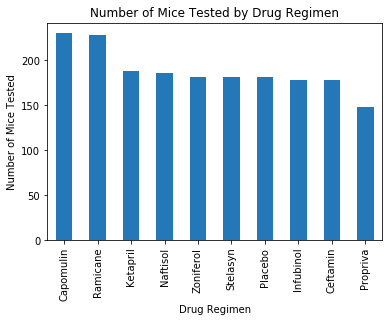

In [118]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Count up the mice treated grouped by "Drug Regimen" and sort by descending: mouse_counts
mouse_counts = mouse_clean_df.groupby("Drug Regimen").count()["Mouse ID"].sort_values(ascending=False)
# Create the bar chart using pandas plot: steelblue
mouse_counts.plot(kind="bar", facecolor="#2578B7")
# label y axis and title
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")


([<matplotlib.axis.XTick at 0x7fbeda060ba8>,
 <a list of 10 Text xticklabel objects>)

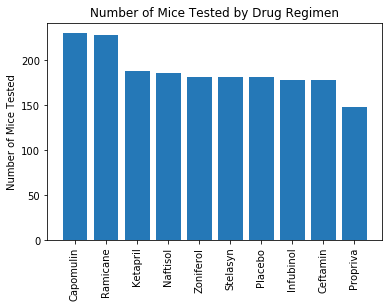

In [127]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# mouse_counts = pd.to_numeric(mouse_counts)
# mouse_int_count = mouse_counts
mouse_x_axis = np.arange(len(mouse_counts))
plt.bar(mouse_x_axis, mouse_counts, color="#2578B7", align="center")
# label y axis and title:
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice Tested by Drug Regimen")
# tick_locations = [value for value in x_axis]
# for key, value in enumerate(mouse_counts):
#      index=mouse_counts.index[key]
mouse_labels = mouse_counts.index 
plt.xticks(mouse_x_axis, mouse_labels,rotation = 90)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
